<a href="https://colab.research.google.com/github/mace1341/studious-invention/blob/main/Insurance_Industry_Premiums.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [ ]:
# Parameters
fred_api_key = '5399ca9dca9e6d6f843feeea567517e5'
fred_series = ['PCU924126924126']
fred_series_label = ['PPI_PC']


In [ ]:
# Helper function
def get_fred_data(param_list, start_date, end_date):
    df = pdr.DataReader(param_list,'fred',start_date,end_date)
    return df.reset_index()

# Scrape Data
dff = get_fred_data(param_list = fred_series,
                    start_date = '1998-06-01',
                    end_date = '2024-07-01')

# Stage Frame
dff.set_index(keys='DATE', inplace=True)
dff.rename(columns={fred_series[0]: fred_series_label[0]}, inplace=True)

In [ ]:
dff




,PPI_PC
DATE,
1998-06-01,100.000
1998-07-01,99.900
1998-08-01,99.900
1998-09-01,99.900
1998-10-01,99.900
...,...
2024-03-01,172.152
2024-04-01,172.365
2024-05-01,173.408


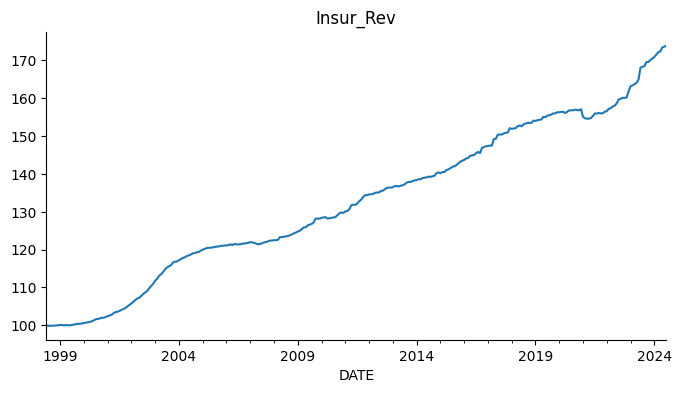

In [ ]:
# @title Insur_Rev

from matplotlib import pyplot as plt
dff['PPI_PC'].plot(kind='line', figsize=(8, 4), title='Insur_Rev')
plt.gca().spines[['top', 'right']].set_visible(False)

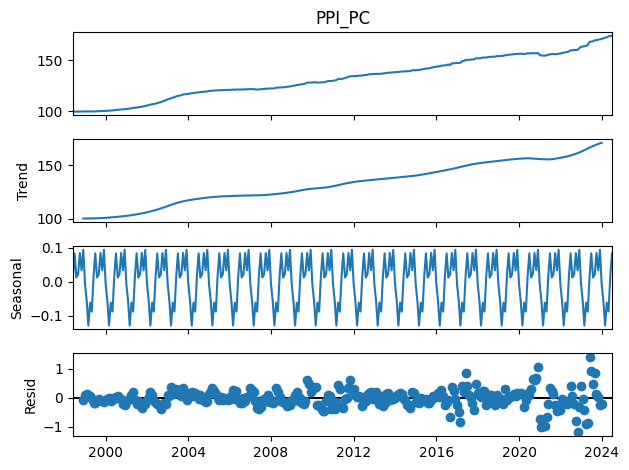

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(dff['PPI_PC'])
results.plot();


In [ ]:
# RNN/LTSM can train models on non-stationary data sets
train_per, test_per = len(dff)-12, 12
train = dff.iloc[:train_per]
test = dff.iloc[train_per:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale datasets
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
import keras

# define generator
n_input = 12
n_features = 1
generator = keras.utils.timeseries_dataset_from_array(data=scaled_train, targets=scaled_train, sequence_length=n_input, batch_size=1)

In [ ]:
# define model
model = keras.models.Sequential()
model.add(keras.layers.LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
# fit model
model.fit(generator, epochs=10)

Epoch 1/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - loss: 3.3721e-05
Epoch 2/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - loss: 0.0058
Epoch 3/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0023
Epoch 4/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0016
Epoch 5/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 9.7587e-04
Epoch 6/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 5.7601e-04
Epoch 7/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 3.4212e-04
Epoch 8/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 1.3019e-04
Epoch 9/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 4.1658e-05
Epoch 10/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 5.7935e-05
